<p align="center" style="font-family: 'Creepster', cursive; font-size: 20px; color: darkwhite;">
  <b>Date Published: December 22, 2024, Author: Adnan Alaref</b>
</p>


**Your Frind developed an algorithm find boxes around the driver 2
hands As shown in the picture below.**  
* The input to the algorithm is 2 points for the wrist and elbow per hand.  
* Then with some logic, the box is computed.  
* Your task: How can we verify the correctness of this algorithm?  

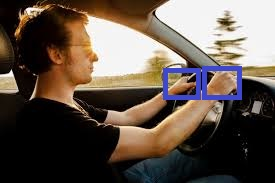

**To solve this task We want to brute-force all possible points locations (wrist, elbow).**  
● Compute the algorithm answer.  
● Compare and judge against some ground truth.  
● So the general direction, we need data (input, output) for most/all possible
cases.

**Variables**
* We have 2 important factors   
    ■ The size of the hand: small or big.  
    ■ The distance between the elbow and wrist.   

Probably we need around 3 persons where we see they have good variance,  (Ex: A woman with a small hand and small elbow-wrist distance).  


**Ask DC (data collection) team :** to collect videos for a person scanning the
whole driver area with his hands in different positions.   
  * Divide the car to regions.  
  * User once scan the whole area slowly with the right hand then the left hand.  
  * For each scan: we can try 5 different hand poses that creates a different hand box.  


**Ask annotator team to annotate:** the hand boxes and 2 joints.

>**We asked the people to dress fully in white and used a glove of different
color (ex. red), we may be able to find automatically the hand.  
Similar tricks might be done for the wrist and elbow.**

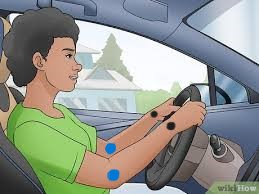

**After we get boxes then we need to compare 2 boxes together,so we use** **`Intersection Over Union metric`** **i will build code from scratch.**


**IoU (Intersection over Union)** is a metric used to evaluate the accuracy of predicted bounding boxes or segmentation masks in comparison to ground truth data. Here's a breakdown:

Formula:
<p align="center">
  IoU =
  <b>Area of Overlap</b> / <b>Area of Union</b>
</p>

**Area of Overlap:** The area where the predicted bounding box/mask and the ground truth box/mask intersect.   
**Area of Union:** The total area covered by both the predicted and ground truth boxes/masks.  

**Range of IoU**
* IoU ranges from 0 to 1:
  * IoU = 0: No overlap.
  * IoU = 1: Perfect overlap.

**Use Cases**

* **Object Detection:** IoU is used to determine if a predicted bounding box is a true positive (e.g., IoU ≥ 0.5 might be the threshold for a correct detection).

* **Image Segmentation:** Measures the quality of predicted segmentation masks.

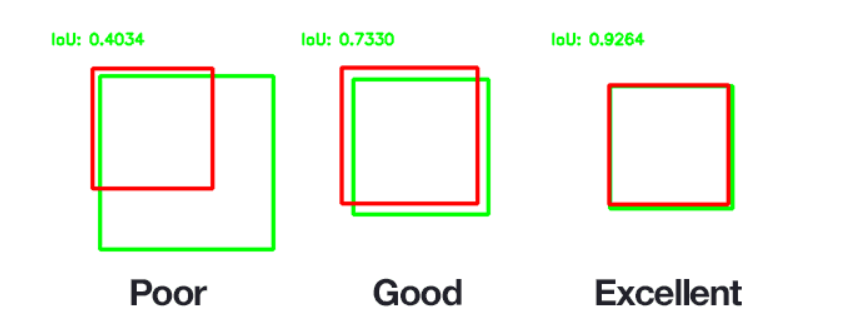

**Let's Code**:
>**I will use threshold = 0.78 To determine an appropriate IOU value.**

IoU: 0.143  POOR


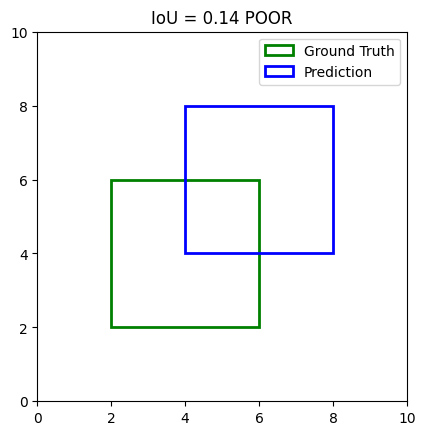

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def calculate_iou(box1, box2):
    """
    Calculate the Intersection over Union (IoU) between two bounding boxes.
    :param box1: [x1, y1, x2, y2] coordinates of the first box
    :param box2: [x1, y1, x2, y2] coordinates of the second box
    :return: IoU value
    """
    # Determine the coordinates of the intersection rectangle
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    # Calculate the area of intersection
    if x_right < x_left or y_bottom < y_top:
        return 0.0  # No intersection
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # Calculate the area of both rectangles
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculate the union area
    union_area = box1_area + box2_area - intersection_area

    # Compute IoU
    iou = intersection_area / union_area
    return iou

# Example bounding boxes
box1 = [2, 2, 6, 6]  # Ground Truth
box2 = [4, 4, 8, 8]  # Prediction

# Calculate IoU
iou = calculate_iou(box1, box2)

# Threshold
threshold = 0.78
statues = None
if(iou>=0.92):
  statues="EXCELLENT"
  print(f"IoU: {iou:.3f}  EXCELLENT")
elif iou >=0.75:
  statues="GOOD"
  print(f"IoU: {iou:.3f}  GOOD")
else:
  statues="POOR"
  print(f"IoU: {iou:.3f}  POOR")

# Visualization
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Draw the boxes
rect1 = patches.Rectangle((box1[0], box1[1]), box1[2] - box1[0], box1[3] - box1[1], linewidth=2, edgecolor='g', facecolor='none', label="Ground Truth")
rect2 = patches.Rectangle((box2[0], box2[1]), box2[2] - box2[0], box2[3] - box2[1], linewidth=2, edgecolor='b', facecolor='none', label="Prediction")

ax.add_patch(rect1)
ax.add_patch(rect2)
plt.legend()
plt.title(f"IoU = {iou:.2f} {statues}",fontsize = 12)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>